In [2]:
import pandas as pd
pd.set_option('max_columns', 0) #Elimina el máximo de columnas en la visualización
import time
import os
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16)) #Aumenta el tamaño de las figuras
import seaborn as sns
import numpy as np
from datetime import datetime

<Figure size 1152x1152 with 0 Axes>

In [2]:
sensor = pd.read_csv('../datasets/water_pump/sensor.csv')
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
sensor.tail()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,43.17085,54.16052,38.05424,13.26532,420.7993,NaN,463.2318,458.3615,2.499117,676.6655,405.7680,894.5920,543.5801,1109.501,611.1745,700.5885,796.5964,692.1138,779.2067,485.0358,691.6666,974.9999,927.6135,477.3156,266.0334,578.5221,817.5707,0.0,47.13541,29.16667,71.61458,30.468750,30.208330,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,43.21038,54.52602,38.53485,13.24227,422.1567,NaN,463.1928,468.4388,2.618476,676.6547,406.2575,895.5599,541.7014,1106.371,609.4917,698.4915,800.1906,697.8002,797.5571,510.9510,672.2222,927.0833,907.9463,487.8679,262.2222,568.1035,807.0151,0.0,46.87500,28.90625,73.17708,30.208332,29.947920,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,43.12836,55.11779,38.52678,13.18866,420.2166,NaN,462.4065,468.6293,2.620500,677.3162,407.1144,892.2204,542.8578,1106.698,610.9940,703.1645,800.3767,704.6601,799.3120,492.7720,689.3519,924.4791,926.8102,494.1249,260.8372,553.8872,805.5605,0.0,46.09375,28.64583,77.08333,29.947920,30.208330,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,42.35746,55.99321,38.89159,13.17346,420.5700,NaN,457.0362,459.7941,2.514596,672.6165,404.3277,887.9969,539.3630,1103.955,605.7183,697.3713,793.7070,706.9692,793.0610,490.2170,687.0370,931.7708,915.4362,484.1161,261.3184,559.4439,807.0808,0.0,45.83333,28.38542,78.64583,29.947916,30.208332,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,15.01013,42.62814,56.49642,39.40957,13.12593,421.2080,NaN,468.9915,456.5726,2.487299,676.5834,405.6293,897.8508,542.0950,1108.827,608.5364,698.0792,800.0387,703.6251,800.2143,496.4068,686.1111,917.7083,926.3979,489.0367,258.4387,558.0558,811.1204,0.0,45.31250,27.86458,77.86458,29.947916,30.208332,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


Con la función describe realizamos un pequeño análisis estadístico de las variables numéricas del dataframe. Con esto observamos que el sensor_15 solo contiene valores nulos o NaN. Por tanto, esta columna se debe eliminar por completo al no aportar información. Se va a eliminar tambíen la columna Unnamed:0, ya que se trata de un índice autoincremental creado por pandas al importar el csv.

In [3]:
sensor.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

In [13]:
#Eliminar la columna Unnamed: 0
sensor.drop('Unnamed: 0', axis=1,inplace=True)
#Eliminar la columna sensor_15
sensor.drop('sensor_15',axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [11]:
# sensor.columns[1:-1]


0         1
1         1
2         1
3         1
4         1
         ..
220315    1
220316    1
220317    1
220318    1
220319    1
Name: machine_status, Length: 220320, dtype: int8

Una vez eliminadas estas columnas vamos a calcular la correlación que existe entre los sensores y la variable objetivo. Esto nos puede servir para eliminar variables que sean totalmente independientes de lo que queremos predecir. Para ello hay que discretizar la variable objetivo y calcular la matriz de correlación con cada una de las demás.

In [17]:
#discretizamos la variable objetivo
sensor['machine_status'] =sensor['machine_status'].astype('category').cat.codes
#obtener correlación entre predictores y target
# sensor[sensor.columns[1:-1]].corr()['machine_status'][:]
correlation = sensor.drop(columns=['timestamp']).corrwith(sensor['machine_status'])

In [22]:
correlation.abs().sort_values(ascending=False)

machine_status    1.000000
sensor_04         0.915709
sensor_10         0.872159
sensor_11         0.823128
sensor_00         0.809421
sensor_02         0.791222
sensor_06         0.773347
sensor_12         0.758429
sensor_50         0.732269
sensor_07         0.699140
sensor_01         0.672936
sensor_03         0.646073
sensor_08         0.637093
sensor_09         0.626093
sensor_05         0.434024
sensor_40         0.375720
sensor_48         0.366613
sensor_38         0.361596
sensor_49         0.285598
sensor_13         0.269751
sensor_47         0.255253
sensor_44         0.235715
sensor_28         0.203195
sensor_46         0.202592
sensor_45         0.202497
sensor_31         0.158429
sensor_32         0.136353
sensor_43         0.118935
sensor_30         0.114367
sensor_33         0.104538
sensor_41         0.104230
sensor_24         0.098802
sensor_23         0.095643
sensor_14         0.091652
sensor_35         0.091079
sensor_16         0.089128
sensor_19         0.088129
s

Con esto podemos seleccionar un primer subconjunto de variables para tener en cuenta en el entrenamiento. Dado que el conjunto de datos tiene 51 sensores, lo cual es una dimensión muy grande podemos establecer un umbral (e.g. 0,7) y quedarnos solamente con las variables con una correlación superior a este valor.

In [41]:
features_cor = correlation[correlation.abs()>0.7].index[:-1]
features_cor

Index(['sensor_00', 'sensor_02', 'sensor_04', 'sensor_06', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_50'],
      dtype='object')

Ahora vamos a ver como se comportan las diferentes variables a lo largo del tiempo

Text(0, 0.5, 'machine_status')

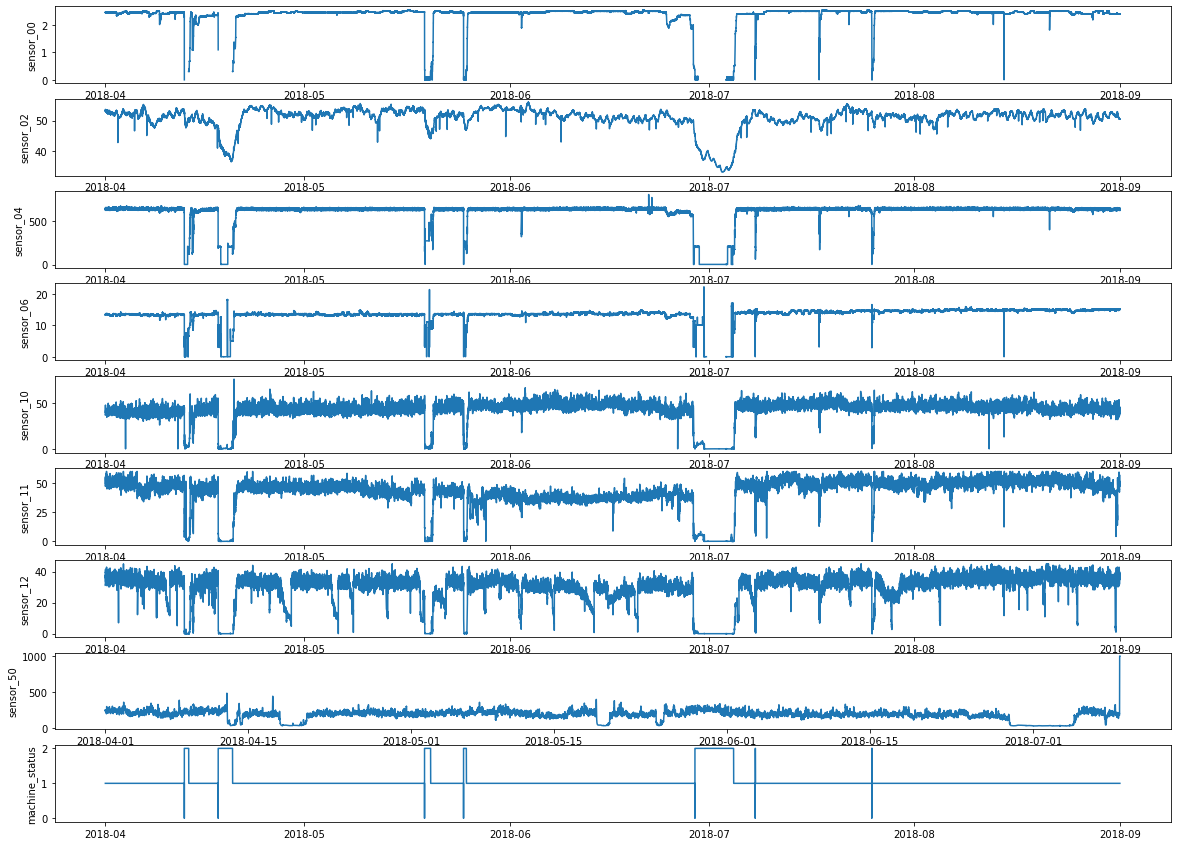

In [66]:
# sensor.timestamp = sensor.timestamp.apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
# sensor.set_index('timestamp', inplace=True) 
num_plots = features_cor.size + 1
fig, ax = plt.subplots(num_plots,figsize=(20, 15))
for i in range(0,num_plots-1):
    ax[i].plot(sensor.index,sensor[features_cor[i]])
    ax[i].set_ylabel(features_cor[i])
ax[i+1].plot(sensor.index,sensor['machine_status'])
ax[i+1].set_ylabel('machine_status')
# sensor[features_cor].plot(kind='line')
# fig.title('Valores del sensor 0 a lo largo del tiempo')
# fig.xlabel('Fecha')
# glabel('Valores')
# plt.show()

En esta gráfica vemos que con el análisis de correlación hemos encontrado unas variables con las que representan bastante bien los fallos de la bomba de agua. Por tanto, parece razonable utilizar esta variables para el entrenamiento de un modelo predictivo.

En un paso futuro habrá que realizar modificaciones a las variables ya que se puede observar que tienen magnitudes diferentes, quedandose algunas en un rango (0,2) mientras otras actuan en un rango (0,1000). Por tanto, un proceso de centrado o estandarización podría hacer que la magnitud no influya en las predicciones. 
Otra transformación que puede resultar interesante es unir los estado BROKEN y RECOVERY, ya que como se ve en la siguiente imagen tienen pocos valores. Así que se puede tratar el problema como un sistema de clasificación binaria con un estado representando el funcionamiento normal y otro un funcionamiento anormal o un fallo. 

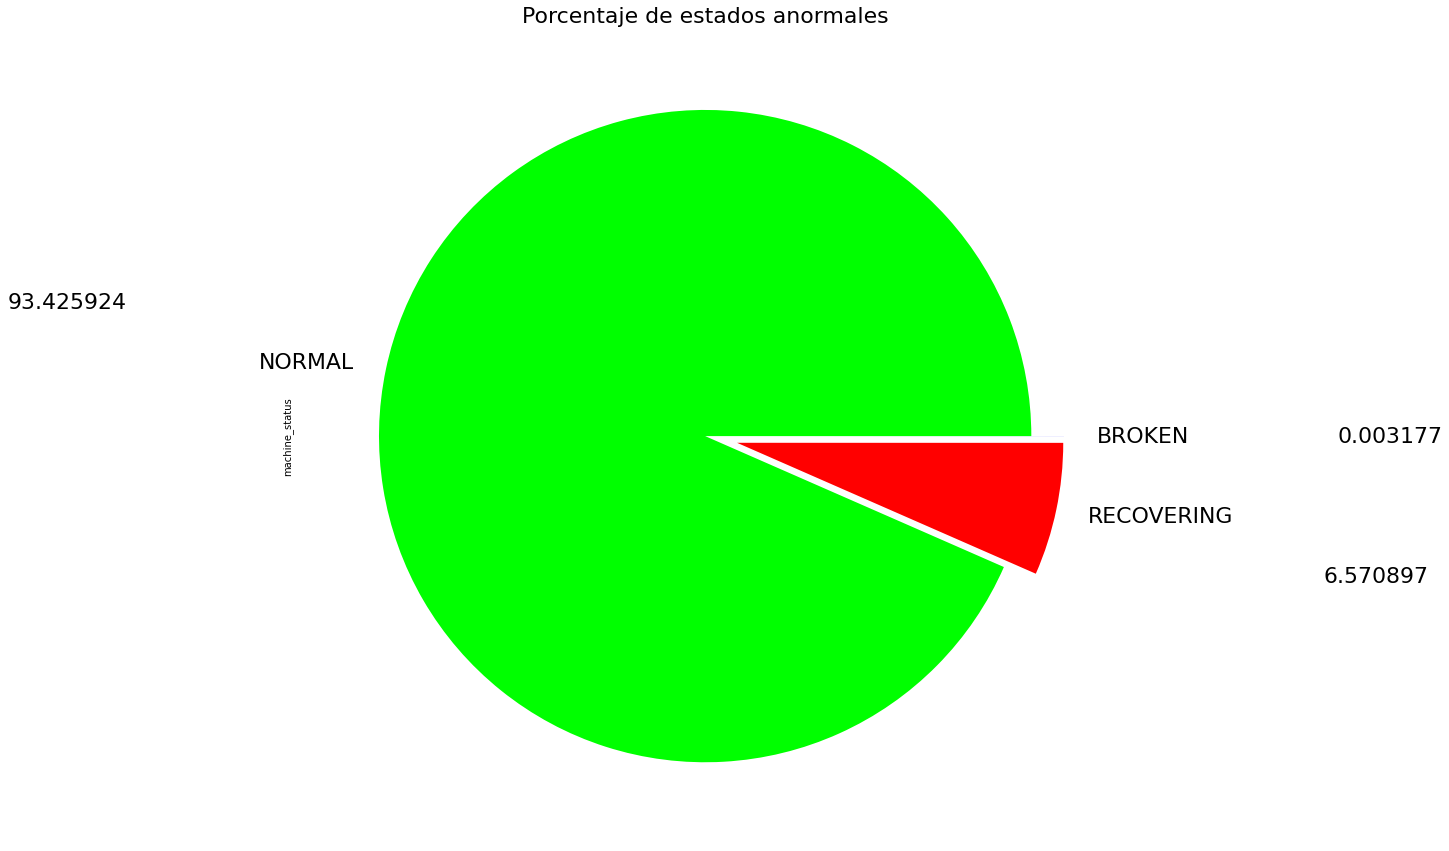

In [3]:
sensor_og = sensor = pd.read_csv('../datasets/water_pump/sensor.csv')
#Conseguir el número de apariciones de cada estado
value_counts = sensor_og.machine_status.value_counts()
#Marcamos un array con los valores que queremos destacar
explode_list = [0,0.1,0.1]
color_list = ['lime','red','blue']
value_counts.plot(kind='pie',
                  explode=explode_list,
                  colors=color_list,
                  autopct='%f',
                  pctdistance=2,
                  figsize=(15,15),
                  fontsize=22)
plt.title('Porcentaje de estados anormales',fontsize=22)
plt.show()

Podemos observar que la muestra no está balanceada, ya que en el 93.42% de los casos el estado de la máquina es normal. Esto es lo esperable en muestras recogidas de cualquier maquinaria, ya que se espera que funcione con normalidad la mayor cantidad de tiempo posible. Sin embargo, de cara a realizar un análisis y crear un modelo predictivo hace que contemos con muy pocas muestras de los casos que realmente nos interesa detectar.